src: https://github.com/abdominalradiology/SAR2020

#### DICOM

In [0]:
!pip3 install pydicom

In [0]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.transform import resize
from pydicom import dcmread
from pydicom.multival import MultiValue
from pydicom.errors import InvalidDicomError

In [6]:
# Download a few example dicom radiographs and save them to /content/images/abdxr_dicom
!wget -q --no-check-certificate 'https://www.dropbox.com/s/9uryqy3fplyy05n/dicoms.zip' -O ./dicoms.zip
!mkdir -p images
!rm -rf ./sample_data
!rm -rf ./images/dicoms
!mkdir ./images/dicoms
!cd images; unzip -q "../dicoms.zip" -d dicoms
!rm -rf ./images/__MACOSX
!ls images
!rm -rf dicoms.zip

dicoms


In [0]:
size = 256, 256
dicomdir = '/content/images/dicoms'

In [0]:
# from fastai2 medical imaging
def windowed(px, w, l):
    """Windows a pixel_array of Houndfield units
    args:
      px = pixel array in Houndfield units
      w = window width (HU range)
      l = window level (center point)
    returns:
      pixel_array convered to the given window/level
    """
    if type(w) == MultiValue:
      w = w[0]
    if type(l) == MultiValue:
      l = l[0]
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

In [0]:
def getwindoweddcm(ds):
    im = ds.pixel_array
    im = im*ds.RescaleSlope + ds.RescaleIntercept
    im = windowed(im, ds.WindowWidth, ds.WindowCenter)
    return im

In [0]:
def printdcmheader(fn, ds):
    print()
    print("Filename..................:", f)
    print("Storage type..............:", ds.SOPClassUID)
    print()
    pat_name = ds.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient name..............:", display_name)
    print("Patient ID................:", ds.PatientID)
    print("Modality..................:", ds.Modality)
    print("Rescale Intercept.........:", ds.RescaleIntercept)
    print("Rescale Slope.............:", ds.RescaleSlope)
    if 'PixelData' in ds:
      rows = int(ds.Rows)
      cols = int(ds.Columns)
      print("Image size ...............: {rows:d} x {cols:d}, {size:d} bytes".format(
          rows=rows, cols=cols, size=len(ds.PixelData)))
      print("Photometric Interpretation:", ds.PhotometricInterpretation)


Filename..................: dcm05
Storage type..............: 1.2.840.10008.5.1.4.1.1.2

Patient name..............: PATIENT, 876930919
Patient ID................: HrzHybwOmJ
Modality..................: CT
Rescale Intercept.........: 0
Rescale Slope.............: 1.000000
Image size ...............: 1024 x 1024, 2097152 bytes
Photometric Interpretation: MONOCHROME2


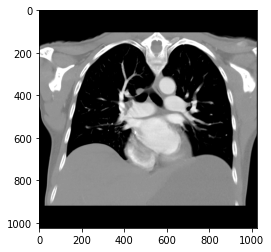


Filename..................: dcm04
Storage type..............: 1.2.840.10008.5.1.4.1.1.2

Patient name..............: PATIENT, 1702756747
Patient ID................: 3EtJuXFaXu
Modality..................: CT
Rescale Intercept.........: 0
Rescale Slope.............: 1.000000
Image size ...............: 512 x 512, 524288 bytes
Photometric Interpretation: MONOCHROME2


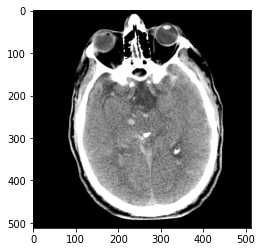


Filename..................: dcm03
Storage type..............: 1.2.840.10008.5.1.4.1.1.2

Patient name..............: PATIENT, 1578595953
Patient ID................: Si9JYiZQts
Modality..................: CT
Rescale Intercept.........: -1024
Rescale Slope.............: 1.000000
Image size ...............: 522 x 512, 534528 bytes
Photometric Interpretation: MONOCHROME2


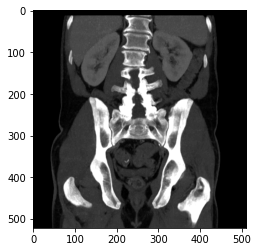


Filename..................: dcm02
Storage type..............: 1.2.840.10008.5.1.4.1.1.2

Patient name..............: PATIENT, 228623729
Patient ID................: CsypH4iX2I
Modality..................: CT
Rescale Intercept.........: 0
Rescale Slope.............: 1.000000
Image size ...............: 1024 x 1024, 2097152 bytes
Photometric Interpretation: MONOCHROME2


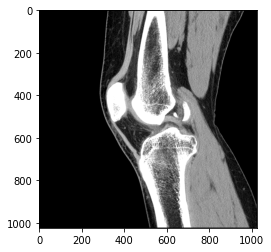


Filename..................: dcm01
Storage type..............: 1.2.840.10008.5.1.4.1.1.2

Patient name..............: PATIENT, 1578595953
Patient ID................: Si9JYiZQts
Modality..................: CT
Rescale Intercept.........: -1024
Rescale Slope.............: 1.000000
Image size ...............: 512 x 512, 524288 bytes
Photometric Interpretation: MONOCHROME2


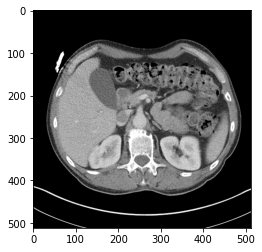

In [8]:
# Read each of the files in dicomdir, print some metadata, and show the image
for root, dirs, files in os.walk(dicomdir):
  for f in sorted(files, reverse=True):
    try:
      ds = dcmread(os.path.join(dicomdir, f))
    except (PermissionError, InvalidDicomError, FileNotFoundError):
      continue
    
    im = getwindoweddcm(ds)
    printdcmheader(f, ds)
    
    plt.imshow(im, cmap="gray")  
    plt.show()

In [9]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 178
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7238010.5.1.4.0.5085.1581750789.3
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7238010.5.1.4.0.5085.1581750789.3
(0008, 0020) Study Date                          DA: '2

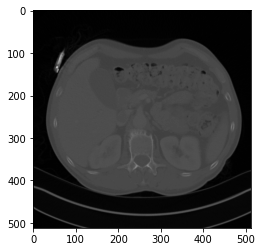

In [13]:
plt.imshow(ds.pixel_array, cmap="gray")  
plt.show()

In [0]:
import numpy as np
# Create a simple 5x5 array of 0s and 1s
ar = np.asarray(
    [
      [1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0],
      [0, 0, 1, 0, 0],
      [0, 1, 0, 1, 0],
      [1, 0, 0, 0, 1],
    ]
  ) 

np.savetxt('array.csv', ar, delimiter=",")

In [0]:
# Resize the 5x5 array to 64x64 - see that the resize algorithm interpolates values to maintain general shape
size = (64, 64)
ar = resize(ar, size, mode='constant', cval=0, preserve_range=True)
np.savetxt('array_resized.csv', ar, delimiter=",")

In [0]:
# We can do the same thing with the DICOM pixel array!
im = ds.pixel_array

im = im*ds.RescaleSlope + ds.RescaleIntercept
im = resize(im, [128, 128], preserve_range=True)
np.savetxt("dicom.csv", im, delimiter=",")

im = windowed(im, ds.WindowWidth, ds.WindowCenter)
np.savetxt("dicom_windowed.csv", im, delimiter=",")

In [0]:
# We can easily save the pixel array to a standard image file format
from PIL import Image
im = ds.pixel_array
im = im*ds.RescaleSlope + ds.RescaleIntercept
im = Image.fromarray(im).convert('RGB')
im.save("dicom.png")
im.save("dicom.jpg")